# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [143]:
# Start your codes here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/02-google-play-store/google-play-store.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


1. Rating has over 10% NULL.
   Rating = 19, noise.
2. Price, Size, Installs, Reviews đưa về numeric.

In [145]:
#Processing Category 

# df['Category'].value_counts()
# df.Category.unique()

# Category has a noise point = 1.9 , drop
i = df[df['Category'] == '1.9'].index
df.loc[i]
df = df.drop(i)

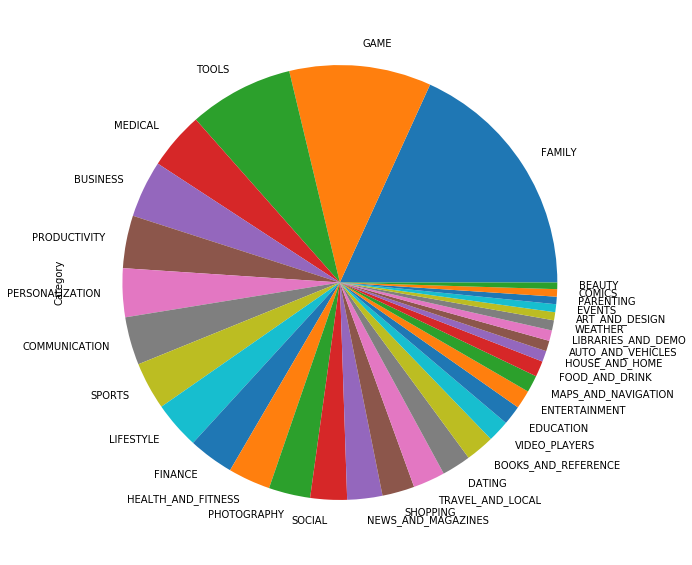

In [146]:
# most Most popular category
plt.figure(figsize=(40,10))
df.Category.value_counts().plot(kind='pie')
plt.show()

In [147]:
# Processing Rating
# df.Rating.unique()
# Rating  = 10 is noise
df.loc[df.Rating == 19, 'Rating'] = df.Rating.mean()
df.Rating.fillna(df.Rating.mean(), inplace = True)
df['Rating'].value_counts()

4.191757    1474
4.400000    1109
4.300000    1076
4.500000    1038
4.200000     952
4.600000     823
4.100000     708
4.000000     568
4.700000     499
3.900000     386
3.800000     303
5.000000     274
3.700000     239
4.800000     234
3.600000     174
3.500000     163
3.400000     128
3.300000     102
4.900000      87
3.000000      83
3.100000      69
3.200000      64
2.900000      45
2.800000      42
2.700000      25
2.600000      25
2.500000      21
2.300000      20
2.400000      19
1.000000      16
2.200000      14
1.900000      13
2.000000      12
1.800000       8
1.700000       8
2.100000       8
1.600000       4
1.500000       3
1.400000       3
1.200000       1
Name: Rating, dtype: int64

In [148]:
#Average Rating of each category
rating ={}
average_rating = {}
for i in df.Category.unique():
    df2 = (df[(df.Category == i)].Rating).tolist()
    if(sum(df2)>0):
        rating.update({i:sum(df2)})
        average_rating.update({i:sum(df2)/len(df2)})
# print(average_rating) 
{a : b for a, b in sorted(average_rating.items(), key=lambda item: item[1], reverse = True)}

{'EDUCATION': 4.387767675772161,
 'EVENTS': 4.363177984198166,
 'ART_AND_DESIGN': 4.35038880402109,
 'BOOKS_AND_REFERENCE': 4.310662957940341,
 'PERSONALIZATION': 4.307288466315417,
 'GAME': 4.2824410828334685,
 'PARENTING': 4.281959570076164,
 'HEALTH_AND_FITNESS': 4.2660918665692265,
 'BEAUTY': 4.260553426887298,
 'SHOPPING': 4.253917935577128,
 'SOCIAL': 4.247807685208306,
 'WEATHER': 4.239540267599984,
 'SPORTS': 4.218136021691934,
 'PRODUCTIVITY': 4.208014838899428,
 'HOUSE_AND_HOME': 4.196603284607769,
 'FAMILY': 4.192213701624171,
 'PHOTOGRAPHY': 4.192094428561864,
 'AUTO_AND_VEHICLES': 4.1906010475939235,
 'MEDICAL': 4.1897809687076375,
 'LIBRARIES_AND_DEMO': 4.181589981283992,
 'FOOD_AND_DRINK': 4.170485303686814,
 'COMMUNICATION': 4.1636012604831,
 'COMICS': 4.1563919140152334,
 'BUSINESS': 4.145447641329875,
 'NEWS_AND_MAGAZINES': 4.142713325169071,
 'FINANCE': 4.138922319889752,
 'ENTERTAINMENT': 4.126174496644294,
 'TRAVEL_AND_LOCAL': 4.119520300211715,
 'LIFESTYLE': 4.112

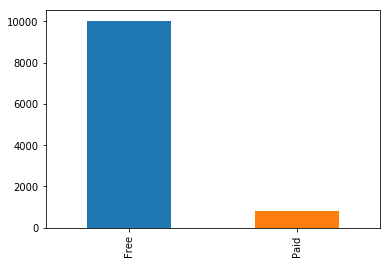

In [149]:
df.Type.value_counts()
df.Type.value_counts().plot(kind='bar')

In [150]:
# App with large number of reviews
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df.sort_values('Reviews',ascending=False).head(10)
# result is facebook.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


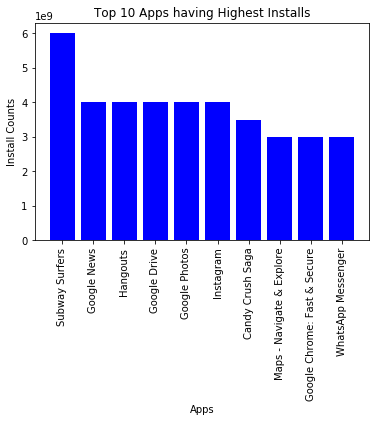

In [151]:
# App with the largest number of installs

df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))


df['Installs'] = df['Installs'].astype(int)
res = df.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

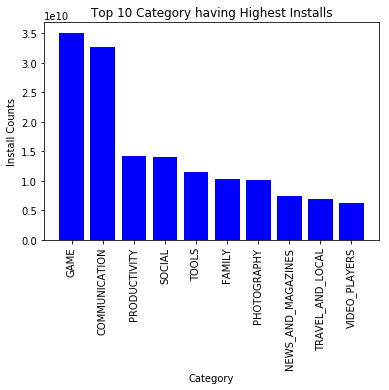

In [152]:
res = df.groupby('Category')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)

plt.bar("Category", "Installs", data = final_result, color = "blue")
plt.xlabel("Category")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Category having Highest Installs")
plt.show()

In [153]:
df.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
421k                     1
982k                     1
257k                     1
437k                     1
54k                      1
50k                      1
6

In [156]:
#Pocessing column Size
df.sort_values('Size',ascending=False)
# there are 1695 rows having  string "Varies with device", drop
df.loc[df.Size == 'Varies with device'].shape

# unwanted = df.loc[df.Size == 'Varies with device']
# unwanted.shape
# df.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
#Drop M, k in column Size
df.Size = df.Size.apply(lambda x: str(x).replace('Varies with device', '0' ))
df.Size = df.Size.apply(lambda x: str(x).replace('M',''))
df.Size = df.Size.apply(lambda x: str(x).replace('k',''))
df.Size = df.Size.apply(lambda x: str(x).replace('+',''))

# df.sort_values('Size',ascending=False).head()
#Converting Size column to numerics
df.Size = pd.to_numeric(df.Size,errors='coerce')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [157]:
print(df.sort_values('Size', ascending=False).iloc[0]['App'])
print(df.sort_values('Size', ascending=False).iloc[0]['Category'])

Word Search Tab 1 FR
FAMILY


Text(0, 0.5, 'Size')

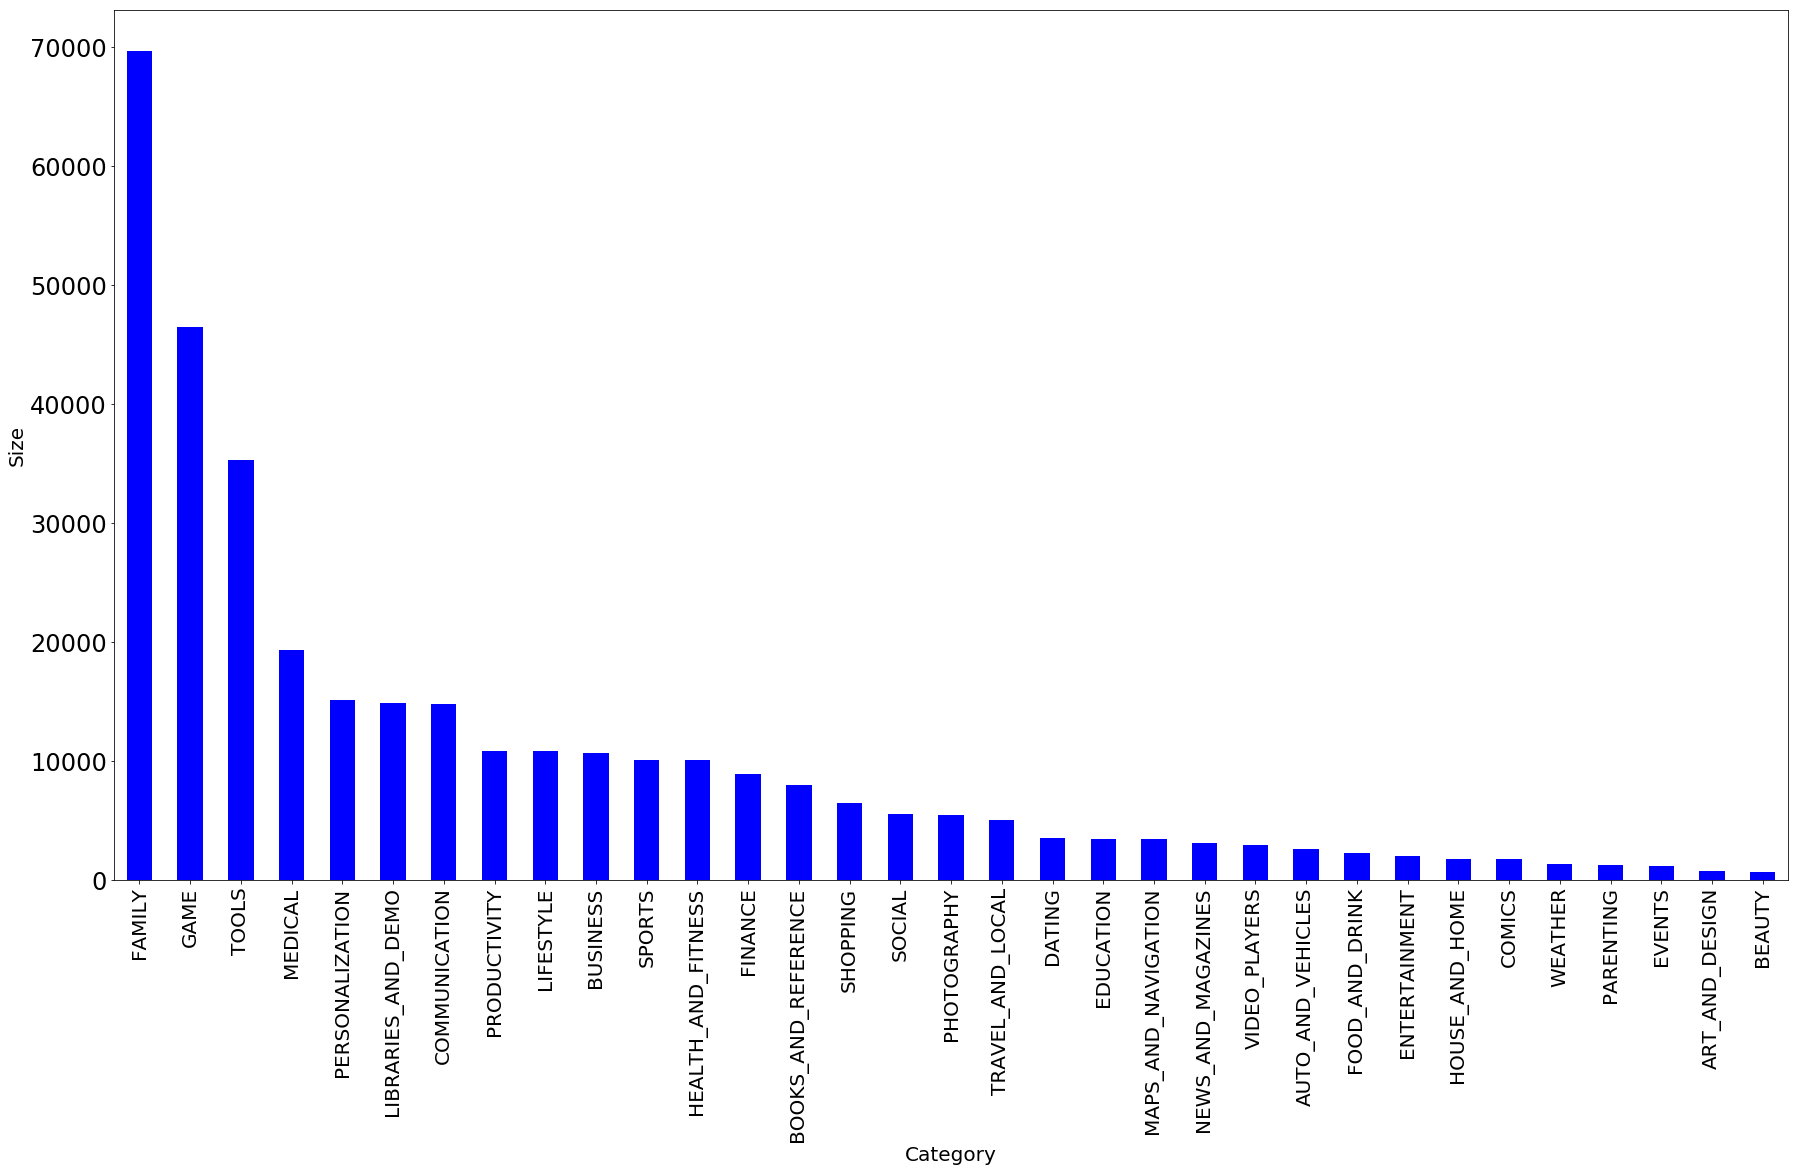

In [158]:
res = df.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

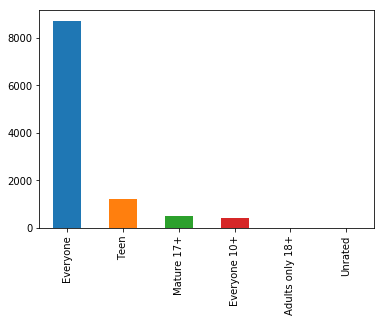

In [159]:
df['Content Rating'].value_counts().plot(kind = 'bar')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null float64
Installs          10840 non-null int32
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 1.1+ MB


In [161]:
#Processing column Price
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df["Price"].replace({"Everyone": "0"})
df['Price'] = pd.to_numeric(df['Price'])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null float64
Installs          10840 non-null int32
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 1.1+ MB
